# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv("weather_data_2023.csv")

In [ ]:
# Show the first 10 rows
df.head(10)

,Date,Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (km/h)
0,2023-01-01,28.5,66.0,0.1,13.6
1,2023-01-02,24.0,72.2,7.4,10.7
2,2023-01-03,29.5,70.1,0.4,10.8
3,2023-01-04,35.7,71.0,2.6,11.4
4,2023-01-05,23.4,62.3,1.0,8.8
5,2023-01-06,23.4,70.2,2.4,12.2
6,2023-01-07,36.1,75.0,3.2,10.2
7,2023-01-08,30.4,84.5,5.3,11.9
8,2023-01-09,21.7,79.6,0.7,9.6
9,2023-01-10,28.8,91.5,0.0,12.6


# Basic Data Check and Date Parsing

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               365 non-null    object 
 1   Temperature (°C)   365 non-null    float64
 2   Humidity (%)       365 non-null    float64
 3   Rainfall (mm)      365 non-null    float64
 4   Wind Speed (km/h)  365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB
None


In [5]:
print(df.isnull().sum())

Date                 0
Temperature (°C)     0
Humidity (%)         0
Rainfall (mm)        0
Wind Speed (km/h)    0
dtype: int64


In [6]:
# Convert 'Date' column to datetime
df['Date']=pd.to_datetime(df['Date'])

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               365 non-null    datetime64[ns]
 1   Temperature (°C)   365 non-null    float64       
 2   Humidity (%)       365 non-null    float64       
 3   Rainfall (mm)      365 non-null    float64       
 4   Wind Speed (km/h)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB
None


# Extract Month and Day

In [8]:
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day

# Daily Temperature Trend

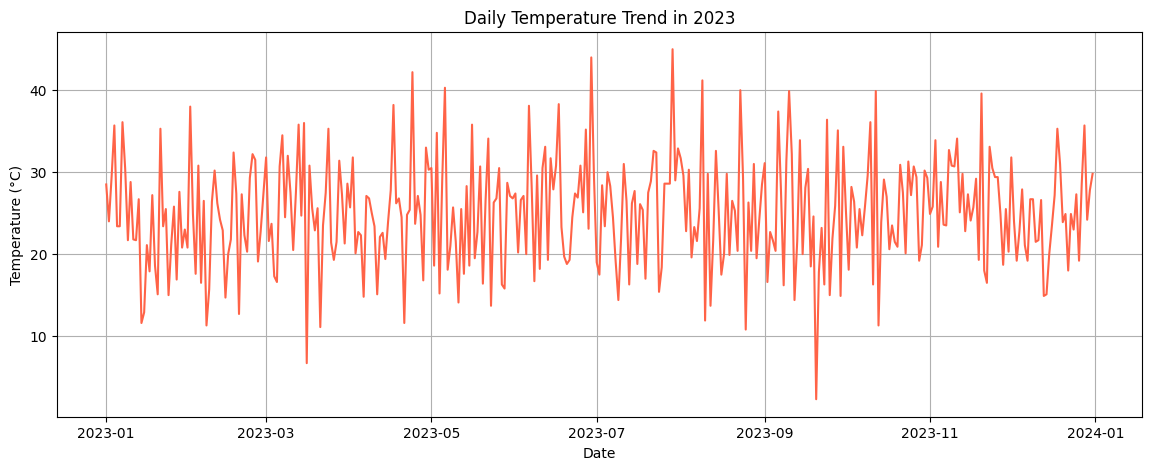

In [10]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x='Date', y='Temperature (°C)', color='Tomato')
plt.title("Daily Temperature Trend in 2023")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# Monthly Rainfall Analysis

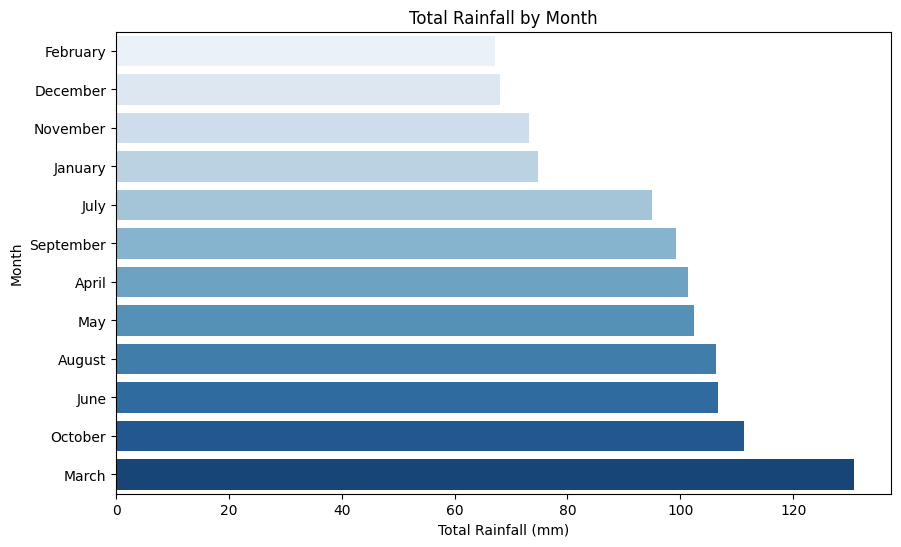

In [12]:
monthly_rain = df.groupby("Month")["Rainfall (mm)"].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_rain.values,y=monthly_rain.index, palette='Blues',hue=monthly_rain.index,label=False)
plt.title("Total Rainfall by Month")
plt.xlabel("Total Rainfall (mm)")
plt.ylabel("Month")
plt.show()

# Average Humidity by Month

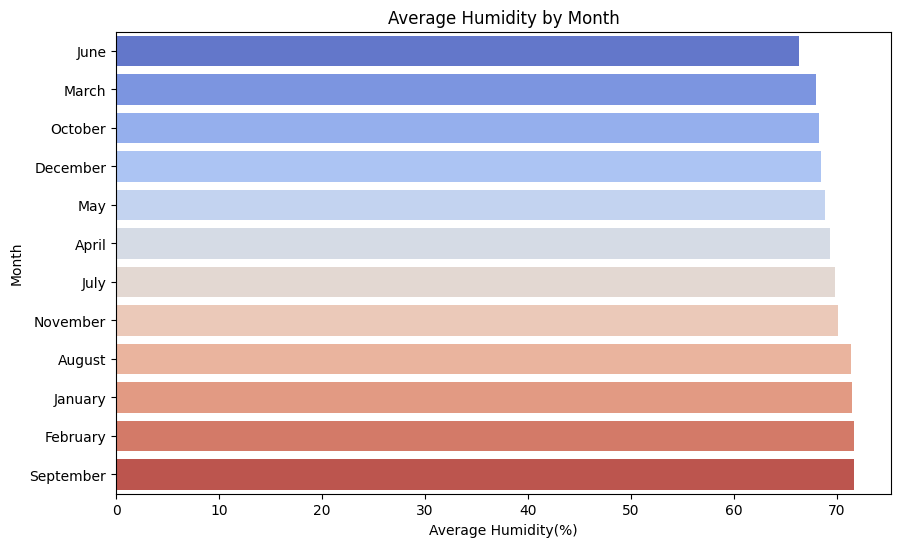

In [14]:
monthly_humidity = df.groupby('Month')['Humidity (%)'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_humidity.values,y=monthly_humidity.index,palette='coolwarm',hue=monthly_humidity.index,legend=False)
plt.title("Average Humidity by Month")
plt.xlabel("Average Humidity(%)")
plt.ylabel("Month")
plt.show()

# Hottest and Coldest Days

In [15]:
hottest_day = df.loc[df["Temperature (°C)"].idxmax()]
coldest_day = df.loc[df["Temperature (°C)"].idxmin()]

print("🔥 Hottest Day:", hottest_day["Date"].date(), "-", hottest_day["Temperature (°C)"], "°C")
print("❄️ Coldest Day:", coldest_day["Date"].date(), "-", coldest_day["Temperature (°C)"], "°C")

🔥 Hottest Day: 2023-07-29 - 45.0 °C
❄️ Coldest Day: 2023-09-20 - 2.3 °C


# Correlation Heatmap

In [17]:
weather_date = df[["Temperature (°C)", "Humidity (%)", "Rainfall (mm)", "Wind Speed (km/h)"]]

In [19]:
correlation_matrix = weather_date.corr()

print(correlation_matrix)

                   Temperature (°C)  Humidity (%)  Rainfall (mm)  \
Temperature (°C)           1.000000     -0.057514       0.099722   
Humidity (%)              -0.057514      1.000000       0.020334   
Rainfall (mm)              0.099722      0.020334       1.000000   
Wind Speed (km/h)         -0.082054      0.079594       0.006085   

                   Wind Speed (km/h)  
Temperature (°C)           -0.082054  
Humidity (%)                0.079594  
Rainfall (mm)               0.006085  
Wind Speed (km/h)           1.000000  


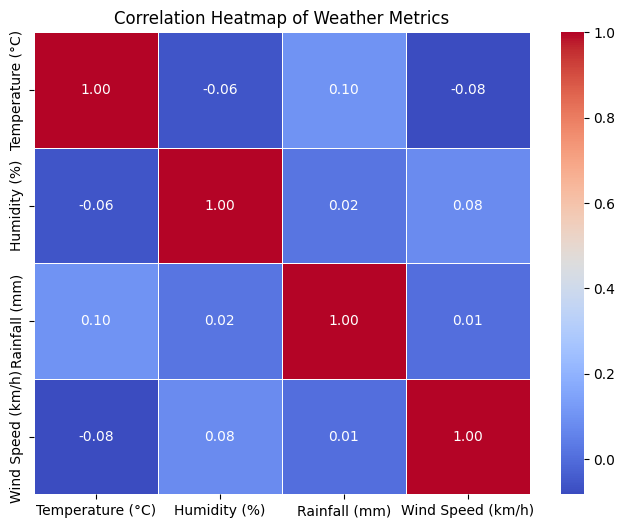

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title("Correlation Heatmap of Weather Metrics")
plt.show()